Note: you may need to restart the kernel to use updated packages.


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,200,778 (4.58 MB)

 Trainable params: 1,200,330 (4.58 MB)

 Non-trainable params: 448 (1.75 KB)

2025-10-18 09:36:59.346685: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 169344000 exceeds 10% of free system memory.


Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 376s 840ms/step - accuracy: 0.9500 - loss: 0.1699 - val_accuracy: 0.3447 - val_loss: 2.1255
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 252s 597ms/step - accuracy: 0.9812 - loss: 0.0652 - val_accuracy: 0.9887 - val_loss: 0.0391
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 254s 601ms/step - accuracy: 0.9858 - loss: 0.0474 - val_accuracy: 0.9908 - val_loss: 0.0335
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 121s 287ms/step - accuracy: 0.9881 - loss: 0.0380 - val_accuracy: 0.9910 - val_loss: 0.0339
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 154s 366ms/step - accuracy: 0.9895 - loss: 0.0325 - val_accuracy: 0.9903 - val_loss: 0.0340
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 177s 418ms/step - accuracy: 0.9913 - loss: 0.0269 - val_accuracy: 0.9895 - val_loss: 0.0394
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 174s 413ms/step - accuracy: 0.9927 - loss: 0.0224 - val_accuracy: 0.9897 - val_loss: 0.0439
313/313 - 6s - 19ms/step - accuracy: 0.9883 - loss: 0.0340
Test accuracy: 0.

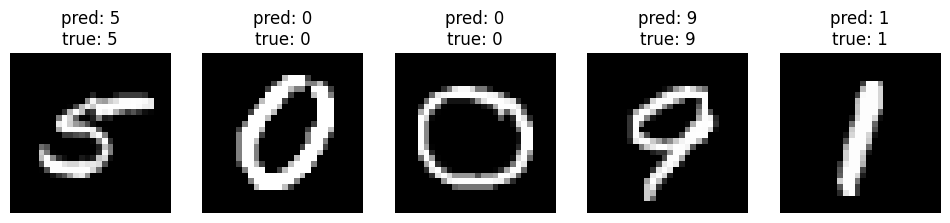

In [2]:
# mnist_cnn_tf.py
# Requirements: tensorflow (>=2.5), matplotlib, numpy
# pip install tensorflow matplotlib

# Install required packages in the notebook environment (run once)
%pip install -q "tensorflow>=2.5" matplotlib numpy

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Normalize and expand dims
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = np.expand_dims(x_train, -1)  # shape (N,28,28,1)
x_test = np.expand_dims(x_test, -1)

# One-hot optional: Keras sparse loss accepts integer labels; we'll use sparse_categorical_crossentropy
num_classes = 10

# Model architecture (simple, robust)
def build_model():
    model = models.Sequential([
        layers.Input(shape=(28,28,1)),
        layers.Conv2D(32, 3, activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, 3, activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(),
        layers.Dropout(0.25),

        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = build_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# Training
callbacks = [
    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True),
]
history = model.fit(x_train, y_train, validation_split=0.1, epochs=20, batch_size=128, callbacks=callbacks)

# Evaluation
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy:", test_acc)

# Ensure >= 95%: if not, consider more epochs, data augmentation, or a slightly larger model
# Visualize 5 sample predictions
import random
idxs = random.sample(range(x_test.shape[0]), 5)
sample_images = x_test[idxs]
preds = model.predict(sample_images)
pred_labels = preds.argmax(axis=-1)

fig, axs = plt.subplots(1,5, figsize=(12,3))
for i, ax in enumerate(axs):
    ax.imshow(sample_images[i].squeeze(), cmap='gray')
    ax.set_title(f"pred: {pred_labels[i]}\ntrue: {y_test[idxs[i]]}")
    ax.axis('off')
plt.show()


In [3]:
# Save the entire model (architecture + weights + optimizer state)
model.save("mnist_model.h5")
